In [1]:
import requests
from bs4 import BeautifulSoup
page = requests.get("https://www.nhtsa.gov/node/97996/251")
page

<Response [200]>

<!DOCTYPE html>
<html dir="ltr" itemscope="" itemtype="http://schema.org/WebPage" lang="en">
 <head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="/sites/nhtsa.dot.gov/themes/nhtsa_gov/images/logo-NHTSA-property.png" itemprop="image"/>
  <link as="script" href="/sites/nhtsa.dot.gov/themes/nhtsa_gov/js/hashed/bundle-ff9ed53558444e8aa4b5.js" rel="preload"/>
  <!-- Google Tag Manager -->
  <script>
   (function (w, d, s, l, i) {
          w[l] = w[l] || [];
          w[l].push({
            'gtm.start': new Date().getTime(), event: 'gtm.js'
          });
          var f = d.getElementsByTagName(s)[0],
            j = d.createElement(s),
            dl = l != 'dataLayer' ? '&l=' + l : '';
          j.async = true;
          j.src =
            'https://www.googletagmanager.com/gtm.js?id=' + i + dl + '&gtm_auth=7b5hIVuHX
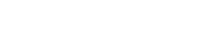
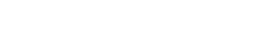

In [2]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

In [3]:
# Find all hyperlink in the website
hpl= soup.find_all('a',href=True)

In [4]:
#Find all the link to each year
dl={} # variable that contains link to each year
for ele in hpl:
    e_text=ele.get_text()
    try:
        year=int(e_text)
        if (year>2008 and year <2019):
            print(year)
            print(ele['href'])
            dl[year]=ele['href']
    except: continue
    

2009
https://www.nhtsa.gov/node/97996/117196
2010
https://www.nhtsa.gov/node/97996/117201
2011
https://www.nhtsa.gov/node/97996/117206
2012
https://www.nhtsa.gov/node/97996/117211
2013
https://www.nhtsa.gov/node/97996/117216
2014
https://www.nhtsa.gov/node/97996/117221
2015
https://www.nhtsa.gov/node/97996/117226
2016
https://www.nhtsa.gov/node/97996/117231
2017
https://www.nhtsa.gov/node/97996/117236
2018
https://www.nhtsa.gov/node/97996/176766


## Download zip file of each year

In [85]:
import wget
for year in dl.keys():
    print(year)
    # find and select the national link
    page1 = requests.get(dl[year])
    soup1 = BeautifulSoup(page1.content, 'html.parser')
    hpl1= soup1.find_all('a',href=True)
    sublink=''
    for ele in hpl1:
        if ele.get_text()=='National':
            sublink=ele['href']
            break
    
    #find and select the csv file
    page1_1 = requests.get(sublink)
    soup1_1 = BeautifulSoup(page1_1.content, 'html.parser')
    hpl1_1= soup1_1.find_all('a',href=True)
    
    dll=''
    for ele in hpl1_1:
        if ele.get_text().endswith('CSV.zip'):
            dll=ele['href']
            break
    
    # Download file to the Data sets folder
    wget.download(dll,out='./Datasets')
    print('')

2009
100% [..........................................................................] 7726936 / 77269362010
100% [..........................................................................] 9370677 / 93706772011
100% [..........................................................................] 9697116 / 96971162012
100% [........................................................................] 10321698 / 103216982013
100% [........................................................................] 11219123 / 112191232014
100% [........................................................................] 11298362 / 112983622015
100% [........................................................................] 12434368 / 124343682016
100% [........................................................................] 14665022 / 146650222017
100% [........................................................................] 14879463 / 148794632018
100% [.....................................................

# Unzip files

In [6]:
from zipfile import ZipFile
import os

In [13]:
filelist=os.listdir('./Datasets')
dict_file=dict(zip(dl.keys(),filelist))
dict_file

{2009: 'FARS2009NationalCSV.zip',
 2010: 'FARS2010NationalCSV.zip',
 2011: 'FARS2011NationalCSV.zip',
 2012: 'FARS2012NationalCSV.zip',
 2013: 'FARS2013NationalCSV.zip',
 2014: 'FARS2014NationalCSV.zip',
 2015: 'FARS2015NationalCSV.zip',
 2016: 'FARS2016NationalCSV.zip',
 2017: 'FARS2017NationalCSV.zip',
 2018: 'FARS2018NationalCSV.zip'}

In [14]:
for year,fname in dict_file.items():
    path='./Datasets/'+fname
    zip_ref=ZipFile(path,'r')
    zip_ref.extractall('./Datasets/'+str(year))
    zip_ref.close()